In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00


In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
from transformers import pipeline

In [6]:
from transformers.pipelines import zero_shot_object_detection


In [7]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [49]:
import skimage
import numpy as np
from PIL import Image
import requests
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [114]:
!ls /content/drive/My\ Drive/dataset/clientadvice.jpg

'/content/drive/My Drive/dataset/clientadvice.jpg'


In [115]:

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = "/content/drive/My Drive/dataset/clientadvice.jpg"
image = Image.open(image)

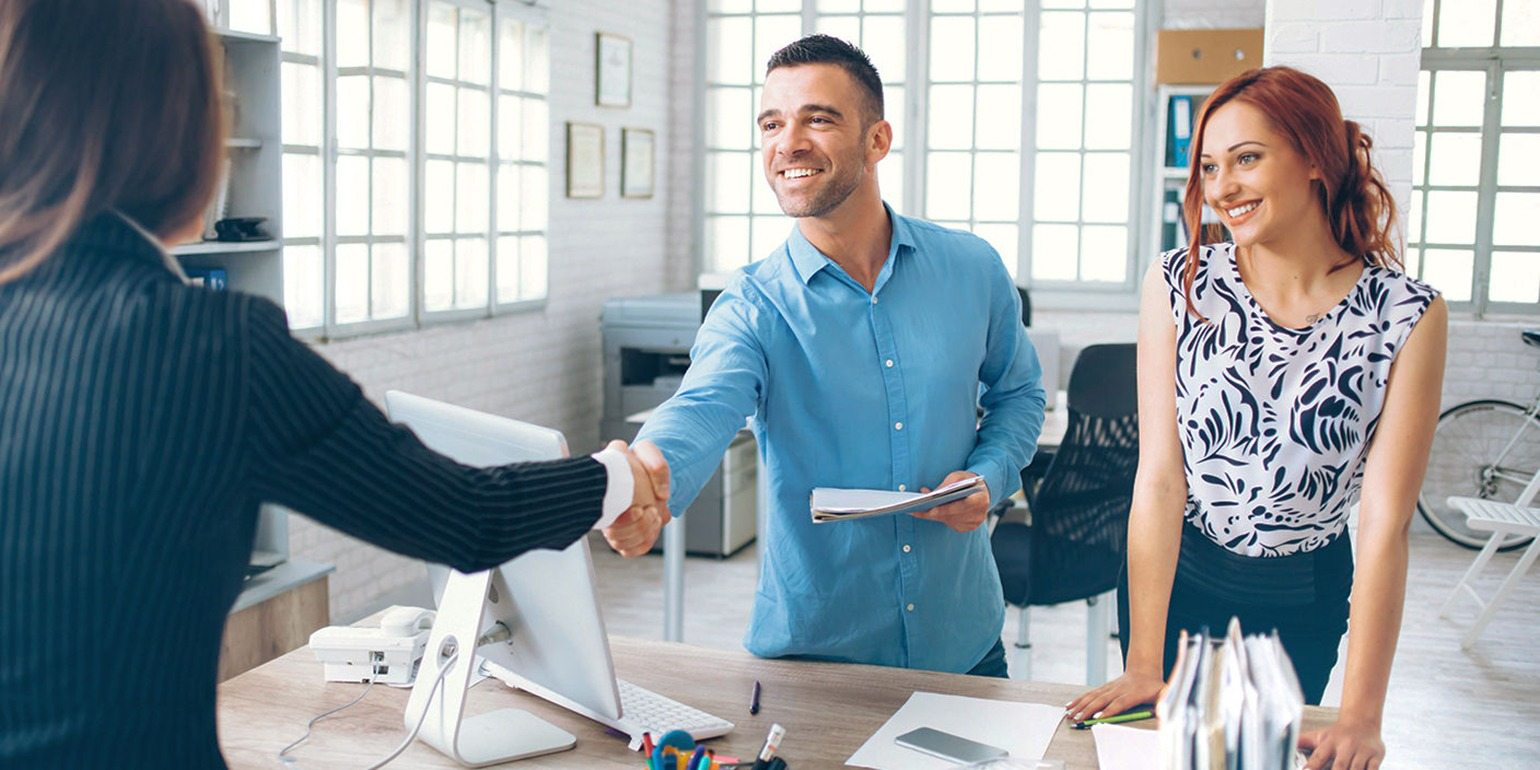

In [116]:
image

In [117]:
predictions = detector(
    image,
    candidate_labels=["human face", "pen", "coffee cup", "mobile phone", "computer"],
)

In [118]:
predictions

[{'score': 0.29943200945854187,
  'label': 'human face',
  'box': {'xmin': 1193, 'ymin': 102, 'xmax': 1319, 'ymax': 236}},
 {'score': 0.28471025824546814,
  'label': 'human face',
  'box': {'xmin': 752, 'ymin': 67, 'xmax': 875, 'ymax': 213}},
 {'score': 0.19115690886974335,
  'label': 'mobile phone',
  'box': {'xmin': 809, 'ymin': 473, 'xmax': 985, 'ymax': 522}},
 {'score': 0.14497675001621246,
  'label': 'mobile phone',
  'box': {'xmin': 887, 'ymin': 726, 'xmax': 1003, 'ymax': 766}},
 {'score': 0.13418634235858917,
  'label': 'human face',
  'box': {'xmin': 169, 'ymin': 77, 'xmax': 231, 'ymax': 233}},
 {'score': 0.10966598242521286,
  'label': 'pen',
  'box': {'xmin': 742, 'ymin': 679, 'xmax': 766, 'ymax': 729}}]

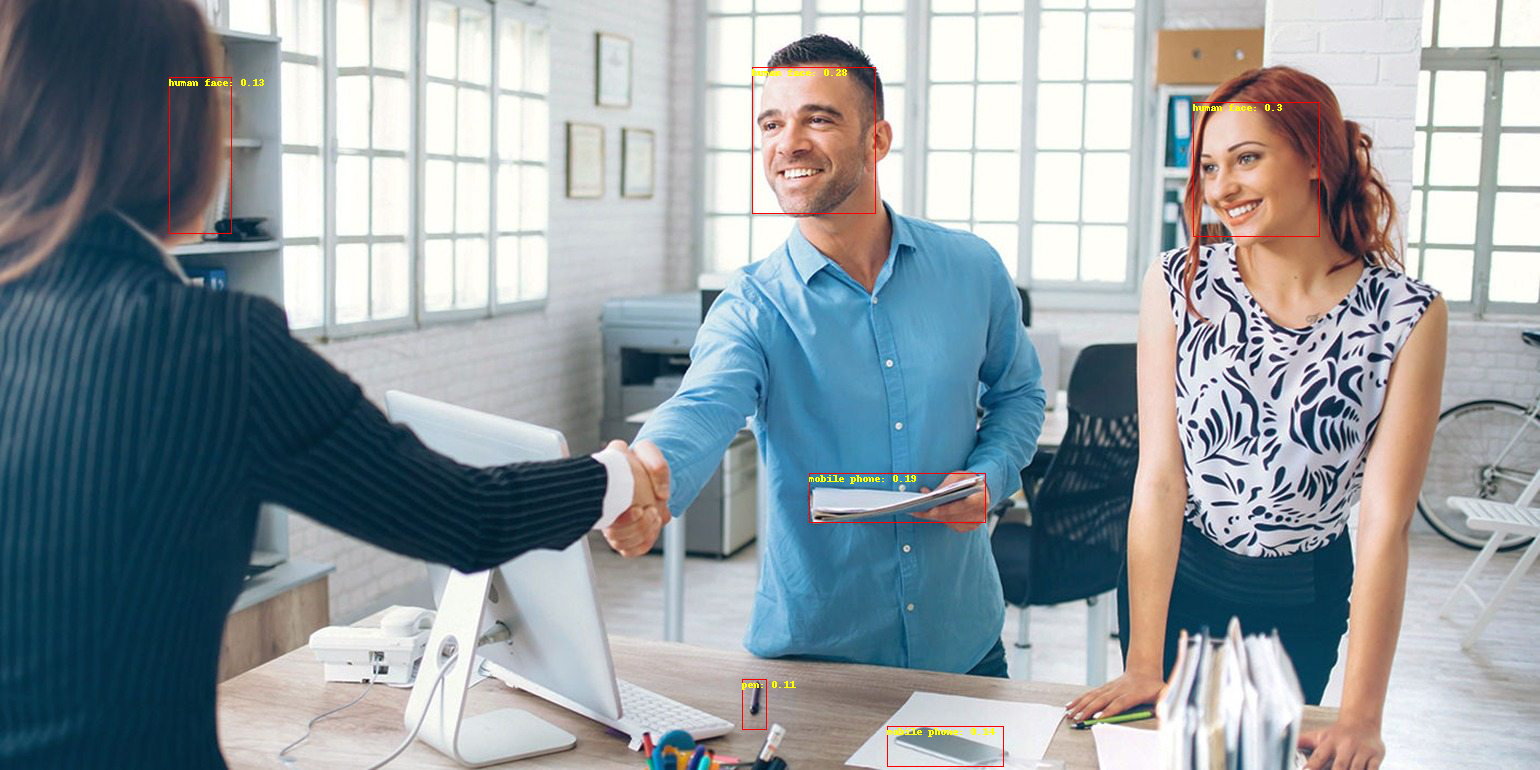

In [119]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="yellow")

image